# Week 9 Group Assignment 

**Notebook 1: KDE and centrograph for housing affordability in New York Metro Area**

For this week's group assignment, we are submitting two notebooks, each countaining spatial data analysis from one of the group members.

In this notebook, I explored and compared the spatial distribution of housing affordability change in New York Metro Area for owner-occupied housing units and rental units. 

I also reviewed the interactive mapping from last week's lecture, and created an interactive map to show the housing affordability change for owner-occupied housing units. Users can choose percent of affordability change from the drop down menu, and the function will create map and charts show the counties with corresponding affordability changes. 

## Basic data analysis and exploration

This assignment is built on past weeks' assignment, and I combined some cells for the data exploration I've already conducted. 

In [11]:
#import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import contextily as ctx
from sodapy import Socrata
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [7]:
#use .read_csv command to import 2014 ACS survey housing affordability data
hao2014 = pd.read_csv('hao2014.csv')
#import 2018 ACS survey housing affordability data
hao2018 = pd.read_csv('hao2018.csv')

In [8]:
#drop the first row (row 0)
hao2014 = hao2014.drop([0])
hao2018 = hao2018.drop([0])

In [9]:
#convert FIPS from object to integer so that I can merge the 2014 housing affordability dataframe with county boundary dataframe
hao2014['FIPS'] = hao2014['FIPS'].astype(str).astype(int)
hao2018['FIPS'] = hao2018['FIPS'].astype(str).astype(int)

In [10]:
#rename some of the columns to avoid repetition with hao2014 data
hao2018.columns=['GEO_ID',
 'NAME',
 'FIPS',
 'DP04_0080E',
 'DP04_0081E',
 'DP04_0081PE',
 'DP04_0082E',
 'DP04_0082PE',
 'DP04_0083E',
 'DP04_0083PE',
 'DP04_0084E',
 'DP04_0084PE',
 'DP04_0085E',
 'DP04_0085PE',
 'DP04_0086E',
 'DP04_0086PE',
 'DP04_0087E',
 'DP04_0087PE',
 'DP04_0088E',
 'DP04_0088PE',
 'DP04_0089E',
 'DP04_0090PE',
 'DP04_0091E',
 'DP04_0091PE',
 'DP04_0092E',
 'DP04_0092PE',
 'DP04_0093E',
 'DP04_0093PE',
 'DP04_0094E',
 'DP04_0094PE',
 'DP04_0098E',
 'DP04_0098PE',
 'DP04_0099E',
 'DP04_0099PE',
 'DP04_0100E',
 'DP04_0100PE',
 'DP04_0098E.1',
 'DP04_0098PE.1',
 'DP04_0099E.1',
 'DP04_0099PE.1',
 'DP04_0100E.1',
 'DP04_0100PE.1',
 'DP04_0102E',
 'DP04_0103E',
 'DP04_0103PE',
 'DP04_0104E',
 'DP04_0104PE',
 'DP04_0105E',
 'DP04_0105PE',
 'DP04_0106E',
 'DP04_0106PE',
 'DP04_0107E',
 'DP04_0107PE',
 'DP04_0108E_y',
 'DP04_0108PE_y',
 'DP04_0109E_y',
 'DP04_0110E_y',
 'DP04_0110PE_y',
 'DP04_0111E_y',
 'DP04_0111PE_y',
 'DP04_0112E_y',
 'DP04_0112PE_y',
 'DP04_0113E_y',
 'DP04_0113PE_y',
 'DP04_0114E_y',
 'DP04_0114PE_y',
 'DP04_0115E_y',
 'DP04_0115PE_y',
 'DP04_0116E_y',
 'DP04_0117E_y',
 'DP04_0120E_y',
 'DP04_0120PE_y',
 'DP04_0121E',
 'DP04_0121PE',
 'DP04_0122E',
 'DP04_0122PE',
 'DP04_0123E',
 'DP04_0123PE',
 'DP04_0124E',
 'DP04_0124PE',
 'DP04_0125E',
 'DP04_0126E',
 'DP04_0127E',
 'DP04_0127PE',
 'DP04_0128E',
 'DP04_0128PE',
 'DP04_0129E',
 'DP04_0129PE',
 'DP04_0130E',
 'DP04_0130PE',
 'DP04_0131E',
 'DP04_0131PE',
 'DP04_0132E',
 'DP04_0132PE',
 'DP04_0133E',
 'DP04_0133PE',
 'DP04_0134E',
 'DP04_0135E',
 'Unnamed: 98',
 'DP04_0137E',
 'DP04_0137PE',
 'DP04_0138E',
 'DP04_0138PE',
 'DP04_0139E',
 'DP04_0139PE',
 'DP04_0140E',
 'DP04_0140PE',
 'DP04_0141E',
 'DP04_0141PE',
 'DP04_0142E',
 'DP04_0142PE',
 'DP04_0143E']

In [14]:
#import county boundary data set
tracts=gpd.read_file('Countyborder/tl_2017_us_county.shp')
tracts['FIPS']=tracts['GEOID']
tracts['FIPS'] = tracts['FIPS'].astype(str).astype(int)

In [16]:
#merge tracts with hao2014 and hao2018 on FIPS
tracts2018=tracts.merge(hao2018,on="FIPS")
tracts2014=tracts.merge(hao2014,on="FIPS")

In [17]:
#convert the data type of columns in 2014 housing affordability dataframe from object to integers for mapping
tracts2014["DP04_0109E"] =tracts2014["DP04_0109E"].astype(str).astype(int)
tracts2014["DP04_0109PE"] =tracts2014["DP04_0109PE"].astype(float).astype(int)
tracts2014["DP04_0110E"] =tracts2014["DP04_0110E"].astype(str).astype(int)
tracts2014["DP04_0110PE"] =tracts2014["DP04_0110PE"].astype(float).astype(int)
tracts2014["DP04_0111E"] =tracts2014["DP04_0111E"].astype(float).astype(int)
tracts2014["DP04_0111PE"] =tracts2014["DP04_0111PE"].astype(float).astype(int)
tracts2014["DP04_0112E"] =tracts2014["DP04_0112E"].astype(float).astype(int)
tracts2014["DP04_0112PE"] =tracts2014["DP04_0112PE"].astype(float).astype(int)
tracts2014["DP04_0113E"] =tracts2014["DP04_0113E"].astype(float).astype(int)
tracts2014["DP04_0113PE"] =tracts2014["DP04_0113PE"].astype(float).astype(int)
tracts2014["DP04_0114E"] =tracts2014["DP04_0114E"].astype(float).astype(int)

In [18]:
#convert the data type of columns in 2018 housing affordability dataframe from object to integers for mapping
tracts2018["DP04_0111E_y"] =tracts2018["DP04_0111E_y"].astype(str).astype(int)
tracts2018["DP04_0111PE_y"] =tracts2018["DP04_0111PE_y"].astype(float).astype(int)
tracts2018["DP04_0112E_y"] =tracts2018["DP04_0112E_y"].astype(str).astype(int)
tracts2018["DP04_0112PE_y"] =tracts2018["DP04_0112PE_y"].astype(float).astype(int)
tracts2018["DP04_0113E_y"] =tracts2018["DP04_0113E_y"].astype(float).astype(int)
tracts2018["DP04_0113PE_y"] =tracts2018["DP04_0113PE_y"].astype(float).astype(int)
tracts2018["DP04_0114E_y"] =tracts2018["DP04_0114E_y"].astype(float).astype(int)
tracts2018["DP04_0114PE_y"] =tracts2018["DP04_0114PE_y"].astype(float).astype(int)
tracts2018["DP04_0115E_y"] =tracts2018["DP04_0115E_y"].astype(float).astype(int)
tracts2018["DP04_0115PE_y"] =tracts2018["DP04_0115PE_y"].astype(float).astype(int)
tracts2018["DP04_0116E_y"] =tracts2018["DP04_0116E_y"].astype(float).astype(int)

In [19]:
#calculating the SMOCAPI<30 for 2014 and 2018 by adding three SMOCAPI categories 
tracts2014['SMOCAPI1430']= tracts2014['DP04_0109PE']+tracts2014['DP04_0110PE']+tracts2014['DP04_0111PE']
tracts2018['SMOCAPI1830']= tracts2018['DP04_0111PE_y']+tracts2018['DP04_0112PE_y']+tracts2018['DP04_0113PE_y']

In [20]:
tracts2018['ac']=tracts2018['SMOCAPI1830']-tracts2014['SMOCAPI1430']

In [36]:
#convert data type from object to integer for later calculation
tracts2014["DP04_0135PE"] =tracts2014["DP04_0135PE"].astype(float).astype(int)
tracts2014["DP04_0136PE"] =tracts2014["DP04_0136PE"].astype(float).astype(int)
tracts2014["DP04_0137PE"] =tracts2014["DP04_0137PE"].astype(float).astype(int)
tracts2014["DP04_0138PE"] =tracts2014["DP04_0138PE"].astype(float).astype(int)
tracts2018["DP04_0137PE"] =tracts2018["DP04_0137PE"].astype(float).astype(int)
tracts2018["DP04_0138PE"] =tracts2018["DP04_0138PE"].astype(float).astype(int)
tracts2018["DP04_0139PE"] =tracts2018["DP04_0139PE"].astype(float).astype(int)
tracts2018["DP04_0140PE"] =tracts2018["DP04_0140PE"].astype(float).astype(int)

In [37]:
#calculate housing affordability change for rental housing units between 2014 and 2018
tracts2014['GRAPI1430']= tracts2014['DP04_0135PE']+tracts2014['DP04_0136PE']+tracts2014['DP04_0137PE']+tracts2014['DP04_0138PE']
tracts2018['GRAPI1830']= tracts2018['DP04_0137PE']+tracts2018['DP04_0138PE']+tracts2018['DP04_0139PE']+tracts2018['DP04_0140PE']
tracts2018['rac']=tracts2018['GRAPI1830']-tracts2014['GRAPI1430']
#get top 5 (radt5) and bottom 5 (racb5) counties in NYMA experienced most and least amount of changes in affordability
ract5=tracts2018 .sort_values(by='rac',ascending = False).head(5)
racb5=tracts2018 .sort_values(by='rac',ascending = False).tail(5)
#create new dataframe by combining the top 5 and bottom 5 counties for plotting
raffordability=ract5.append(racb5)

## Interactive map for owner-occupied housing affordability change

In [22]:
#let's zoom in to find the counties with housing affordability change equals to 7
tracts2018[tracts2018.ac == 7.0].head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME_x,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,DP04_0139PE,DP04_0140E,DP04_0140PE,DP04_0141E,DP04_0141PE,DP04_0142E,DP04_0142PE,DP04_0143E,SMOCAPI1830,ac
10,42,089,01209184,42089,Monroe,Monroe County,06,H1,G4020,408,...,11.1,1599,13.8,1246,10.7,4780,41.2,1044,60,7
13,34,025,00882910,34025,Monmouth,Monmouth County,06,H1,G4020,408,...,12.3,6236,10.8,4731,8.2,27317,47.2,3665,63,7
15,34,029,00882279,34029,Ocean,Ocean County,06,H1,G4020,408,...,9.4,5104,12.2,3633,8.7,21638,51.7,3255,58,7
18,34,027,00882231,34027,Morris,Morris County,06,H1,G4020,408,...,15,5372,12.1,3646,8.2,15316,34.6,1973,66,7
19,34,013,00882276,34013,Essex,Essex County,06,H1,G4020,408,...,11.1,17135,11.4,14663,9.7,69401,46,6880,56,7


I want to create an interactive map that shows different counties with various level of housing affordability change: people can choose different percentage of housing affordability change ("ac" category) and show the counties. 

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME_x,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,DP04_0139PE,DP04_0140E,DP04_0140PE,DP04_0141E,DP04_0141PE,DP04_0142E,DP04_0142PE,DP04_0143E,SMOCAPI1830,ac
10,42,089,01209184,42089,Monroe,Monroe County,06,H1,G4020,408,...,11.1,1599,13.8,1246,10.7,4780,41.2,1044,60,7
13,34,025,00882910,34025,Monmouth,Monmouth County,06,H1,G4020,408,...,12.3,6236,10.8,4731,8.2,27317,47.2,3665,63,7
15,34,029,00882279,34029,Ocean,Ocean County,06,H1,G4020,408,...,9.4,5104,12.2,3633,8.7,21638,51.7,3255,58,7
18,34,027,00882231,34027,Morris,Morris County,06,H1,G4020,408,...,15,5372,12.1,3646,8.2,15316,34.6,1973,66,7
19,34,013,00882276,34013,Essex,Essex County,06,H1,G4020,408,...,11.1,17135,11.4,14663,9.7,69401,46,6880,56,7


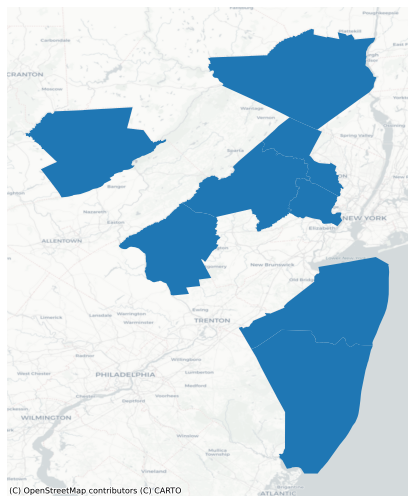

In [23]:
#plot those counties onto the map
display(tracts2018[tracts2018.ac == 7].head()) 

# map
ax = tracts2018[tracts2018.ac == 7].plot(figsize=(9,9))

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', 
                source=ctx.providers.CartoDB.Positron) #change the base map

In [24]:
# create a function to show housing affordability chang on the map
def affordabilitychange_by(ac=7):
    # table
    display(tracts2018[tracts2018.ac == ac].head()) 
    
    # map
    ax = tracts2018[tracts2018.ac == ac].plot(figsize=(9,9))
    
    # axis
    ax.axis('off')
    
    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', 
                    source=ctx.providers.CartoDB.Positron)

In [27]:
#make the map and charts interactive
@interact

def affordabilitychange_by(ac=(2,9)): #change the range of the slider
    # table
    display(tracts2018[tracts2018.ac == ac].head()) 

    # map
    ax = tracts2018[tracts2018.ac == ac].plot(figsize=(9,9), color='wheat',alpha=0.5,edgecolor='k')
    
    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', 
                    source=ctx.providers.CartoDB.Positron)

interactive(children=(IntSlider(value=5, description='ac', max=9, min=2), Output()), _dom_classes=('widget-int…

## Spatial data analysis of owner-occupied and rental housing affordability change 

### KDE plots

In [29]:
#identify centroid of polygons and create a new polygon
tracts2018['cents'] = tracts2018.centroid
tracts2018.head()

<ipython-input-29-becea95e7fa1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts2018['cents'] = tracts2018.centroid


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME_x,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,DP04_0140E,DP04_0140PE,DP04_0141E,DP04_0141PE,DP04_0142E,DP04_0142PE,DP04_0143E,SMOCAPI1830,ac,cents
0,34,037,00882236,34037,Sussex,Sussex County,06,H1,G4020,408,...,1018,11.8,815,9.5,3671,42.6,730,64,8,POINT (-74.69080 41.13930)
1,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,408,...,1716,8.6,2111,10.5,9862,49.2,1682,63,6,POINT (-74.25857 41.88815)
2,36,103,00974149,36103,Suffolk,Suffolk County,06,H1,G4020,408,...,9917,11,8180,9.1,45855,50.9,6949,56,5,POINT (-72.68524 40.94046)
3,34,039,00882235,34039,Union,Union County,06,H1,G4020,408,...,8186,11.1,6691,9,32639,44.1,3742,59,8,POINT (-74.30814 40.65990)
4,36,027,00974112,36027,Dutchess,Dutchess County,06,H1,G4020,408,...,3021,9.6,2754,8.8,14591,46.4,2112,61,5,POINT (-73.74286 41.76515)


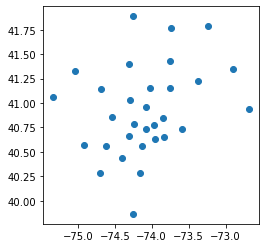

In [30]:
#simple plot of the center points of each polygon
tracts2018.cents.plot()

In [31]:
#extract latitude and longitude from center points and create two new columns 
tracts2018['x'] = tracts2018.cents.x
tracts2018['y'] = tracts2018.cents.y

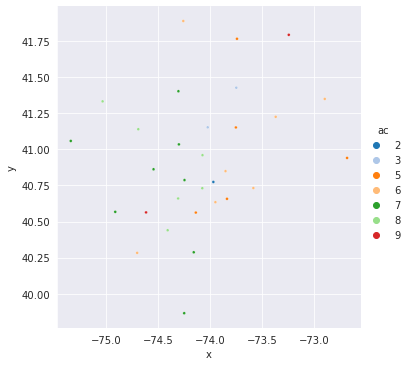

In [32]:
#plot the center points of polygons with owner-occupied housing units' affordability change
sns.set_style('darkgrid') #change the style of the plot
sns.relplot(data=tracts2018,
            x='x', 
            y='y',
            hue='ac', #categories to plot
            palette='tab20',
            s=8)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


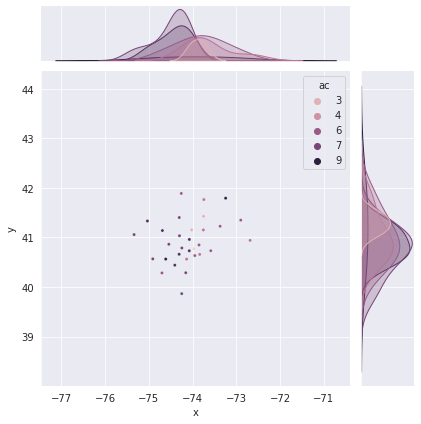

In [33]:
#look at the spatial distribution of the data
g = sns.jointplot(data = tracts2018,
                  x='x', 
                  y='y',
                  hue='ac',
                  s=10)

In [34]:
#create a new dataframe with owner-occupied housing units' affordability change
gdf_ac = tracts2018[tracts2018.ac.isin([2,3,5,6,7,8,9])]

In [38]:
#create a new dataframe with rental housing units' affordability change
gdf_rac = tracts2018[tracts2018.rac.isin([-2,-1,0,0,2,3,4,5,6,9])]

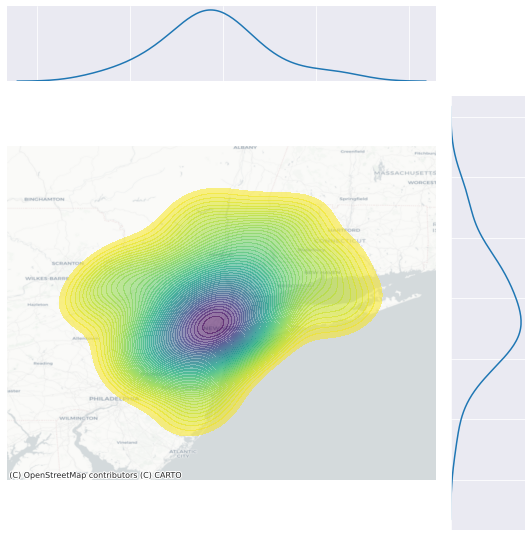

In [39]:
#KDE plot for owner-occupied housing units' affordability change
g = sns.jointplot(data = gdf_ac,
                  x='x', 
                  y='y',
                  kind='kde',
                  shade=True,
                  alpha=0.55,
                  cmap='viridis_r',
                  n_levels=50, 
                  height=8 # make the map bigger
                 )
# Clean axes
g.ax_joint.set_axis_off()

# add basemap
ctx.add_basemap(g.ax_joint,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

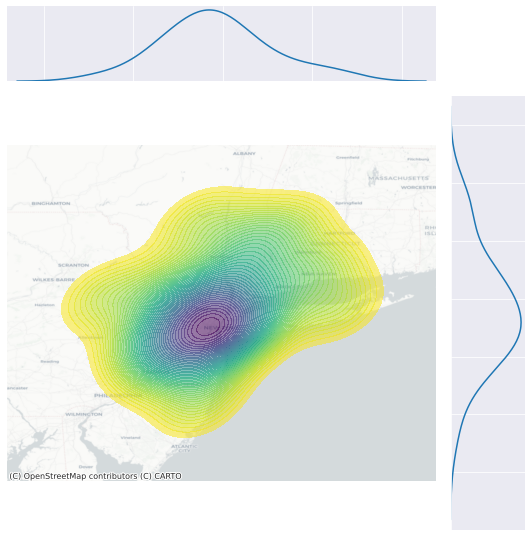

In [40]:
#KDE plot for rental housing units' affordability change
g1 = sns.jointplot(
                  data = gdf_rac,
                  x='x', 
                  y='y',
                  kind='kde',
                  shade=True, #adding shade to the plot
                  alpha=0.55, #change transparency
                  cmap='viridis_r', #change color of the shade
                  n_levels=50, 
                  height=8 # make the map bigger
                 )
g1.ax_joint.set_axis_off()
ctx.add_basemap(g1.ax_joint,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

#### Conclusion based on KDE plots

From the KDE plots, the spatial distribution of affordability changes of owner-occupied units and rental units are roughly the same with highest concentration in New Jersey, around the counties to the north west of New York City. Both categories' concentrations decreases the fastest in the southeaster direction of the center. 

### Centrography Analysis

In [42]:
#find spatial means and medians of two categories
mean_center0 = centrography.mean_center(gdf_ac[['x','y']])
med_center0 = centrography.euclidean_median(gdf_ac[['x','y']])
mean_center1 = centrography.mean_center(gdf_rac[['x','y']])
med_center1 = centrography.euclidean_median(gdf_rac[['x','y']])

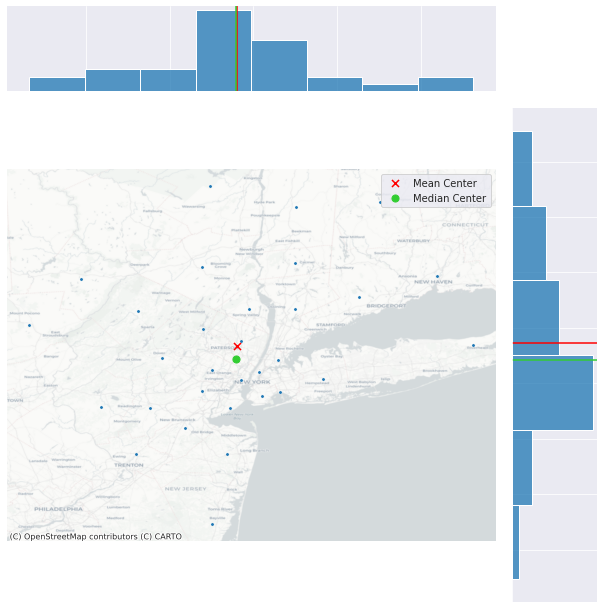

In [43]:
#plot the spatial distribution of owner-occupied units' housing affordability change with mean and median
g = sns.jointplot(
    x='x', y='y', data=gdf_ac, s=10, height=9
)

# Add mean point and marginal lines
g.ax_joint.scatter(
    *mean_center0, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center0[0], color='red')
g.ax_marg_y.axhline(mean_center0[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center0, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center0[0], color='limegreen')
g.ax_marg_y.axhline(med_center0[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()

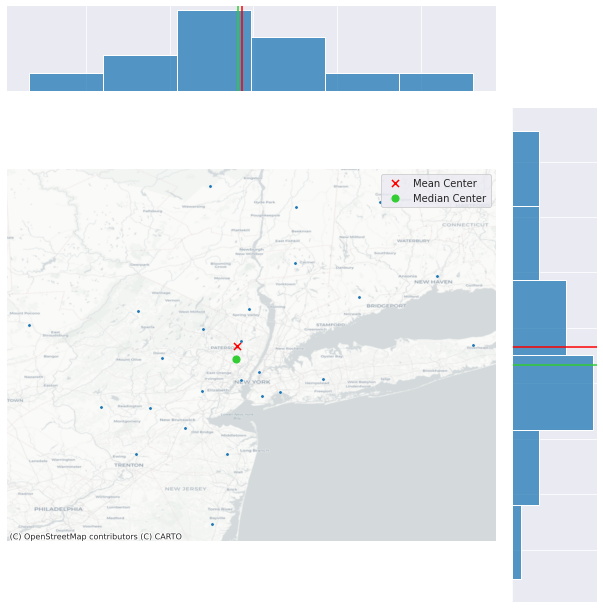

In [44]:
#generate the spatial distribution of rental units' housing affordability change with mean and median
#generate scatter plot
g1 = sns.jointplot(
    x='x', y='y', data=gdf_rac, s=10, height=9
)

# Add mean point and marginal lines
g1.ax_joint.scatter(
    *mean_center0, color='red', marker='x', s=50, label='Mean Center'
)
g1.ax_marg_x.axvline(mean_center1[0], color='red')
g1.ax_marg_y.axhline(mean_center1[1], color='red')

# Add median point and marginal lines
g1.ax_joint.scatter(
    *med_center0, color='limegreen', marker='o', s=50, label='Median Center'
)
g1.ax_marg_x.axvline(med_center1[0], color='limegreen')
g1.ax_marg_y.axhline(med_center1[1], color='limegreen')

# Legend
g1.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g1.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g1.ax_joint.set_axis_off()

# Display
plt.show()


#### Conclusion from Centrography Analysis

The discrepency between the two points in the above map is caused by the skew.there are many “clusters” of change in housing affordability far out in East and North NYMA, whereas South and West NYMA is densely packed, but drops off very quickly. Thus, the far out clusters of pictures pulls the mean center to the east and north, relative to the median center.

### Dispersion

In [46]:
# compute the axes and rotation using the ellipse function in pointpats for owner-occupied housing units
major, minor, rotation = centrography.ellipse(gdf_ac[['x','y']])

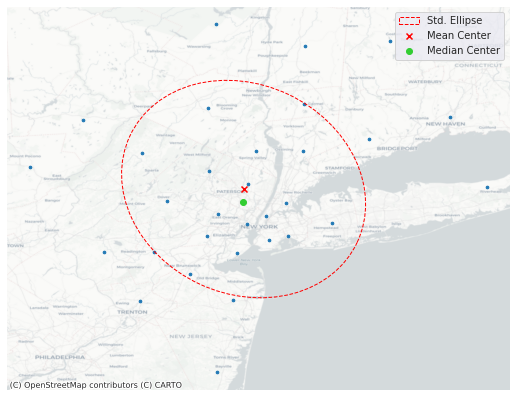

In [47]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

ax.scatter(gdf_ac['x'], gdf_ac['y'], s=7)
ax.scatter(*mean_center0, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center0, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center0, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

The standard deviation ecllipse shows the spatial spread of points on the map. The maximum spread of housing affordability change is roughly in the northwestern-southeastern direction, and the minimum spread of housing affordability change is roughly in the southwester-northeastern direction. 

In [48]:
# compute the axes and rotation using the ellipse function in pointpats for rental housing units
major, minor, rotation = centrography.ellipse(gdf_rac[['x','y']])

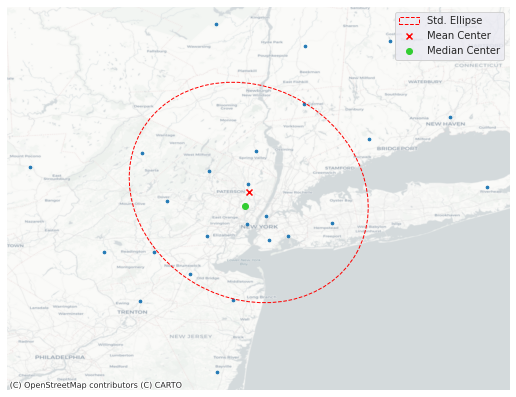

In [49]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

ax.scatter(gdf_rac['x'], gdf_rac['y'], s=7)
ax.scatter(*mean_center1, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center1, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center1, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

Compared with the centrography of owner-occupied housing units' affordability change, The maximum spread of rental units' housing affordability change is roughly in the same direction (northwestern-southeastern), and so does the the minimum spread (southwester-northeastern direction).

## Contribution from each team member

For this assignment, two team members each conducted individual spatial analysis on the data we are working with. 